# Librerías y configuraciones

In [15]:
# Arrays para manipular datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 8)
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)

# Ciencia de datos, machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# https://scikit-learn.org/stable/modules/clustering.html

# Carga de datos

In [2]:
# https://drive.google.com/file/d/1sWLmuazrRKlb1_c88soFRqQYF0wXCxgT/view?usp=sharing
data = pd.read_csv("./wine.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Escalado



In [3]:
scaler = StandardScaler()
scaler.fit(data)
data_escalada = scaler.transform(data)

# PCA exploratorio



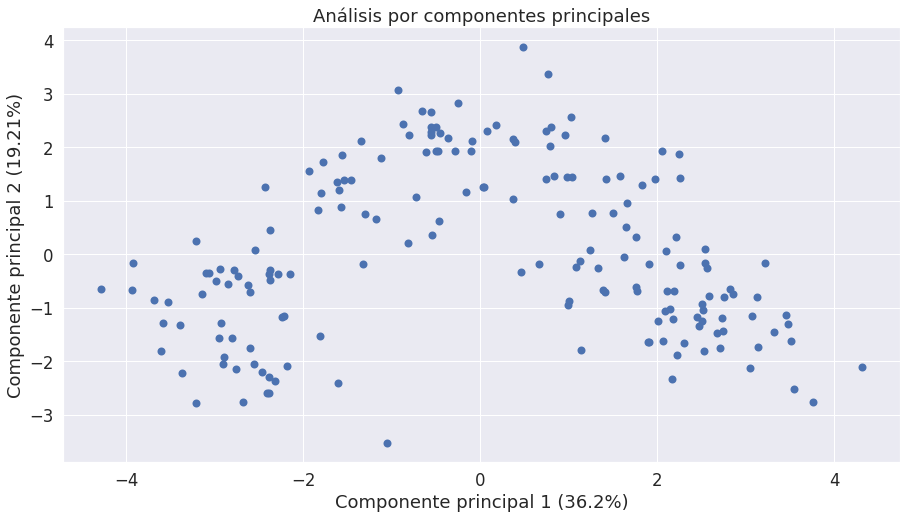

In [16]:
# instancio la clase
pca = PCA(n_components=2)
# calculo PCA
pca.fit(data_escalada)
# transformo los datos originales al plano PCA
pca_data = pca.transform(data_escalada)

# cálculo varianza explicada
vars = pca.explained_variance_ratio_
var1 = round(100*vars[0],2)
var2 = round(100*vars[1],2)

# gráfico
plt.scatter(x=pca_data[:,0], y=pca_data[:,1], lw=2)
plt.xlabel("Componente principal 1 ({}%)".format(var1))
plt.ylabel("Componente principal 2 ({}%)".format(var2))
plt.title("Análisis por componentes principales")
plt.show()

# Clustering (agrupamiento) jerárquico aglomerativo

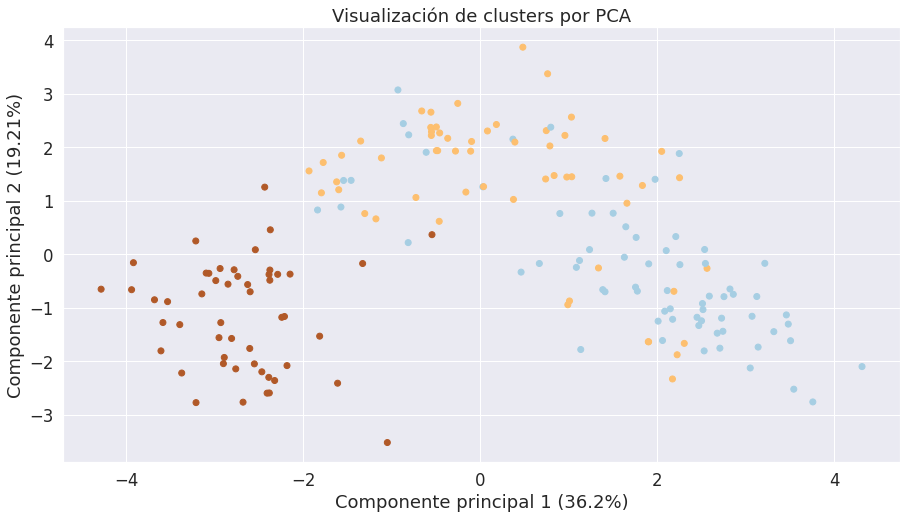

In [20]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
politica_agrupamiento = ['ward', 'complete', 'average', 'single']
cant_cluster = 3
clustering = AgglomerativeClustering(n_clusters=cant_cluster, linkage=politica_agrupamiento[1])
# Al igual que en k-means, también se puede cambiar la noción de distancia (además de la política de agrupamiento)

clustering.fit(data_escalada)

y_jerarq = pd.Series(clustering.labels_)


# grafico en el plano PCA datos y clusters
plt.scatter(pca_data[:,0],pca_data[:,1], c=clustering.labels_, cmap="Paired")
# plt.scatter(centroides_pca[:,0],centroides_pca[:, 1], c="red", s=200)
plt.xlabel("Componente principal 1 ({}%)".format(var1))
plt.ylabel("Componente principal 2 ({}%)".format(var2))
plt.title("Visualización de clusters por PCA")
plt.show()

# Exploración de las características de los clusters

In [11]:
# Agrega una nueva variable con el cluster al que pertenece cada observación
data["Cluster"] = y_jerarq

# Calculo la media de cada variable para cada cluster
data.groupby(["Cluster"]).mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster,,,,,,,,,,,,,
0,12.203966,1.938966,2.215172,20.208621,92.551724,2.262931,2.088103,0.355345,1.686552,2.895345,1.060000,2.862241,501.431034
1,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429
2,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158438,1076.046875


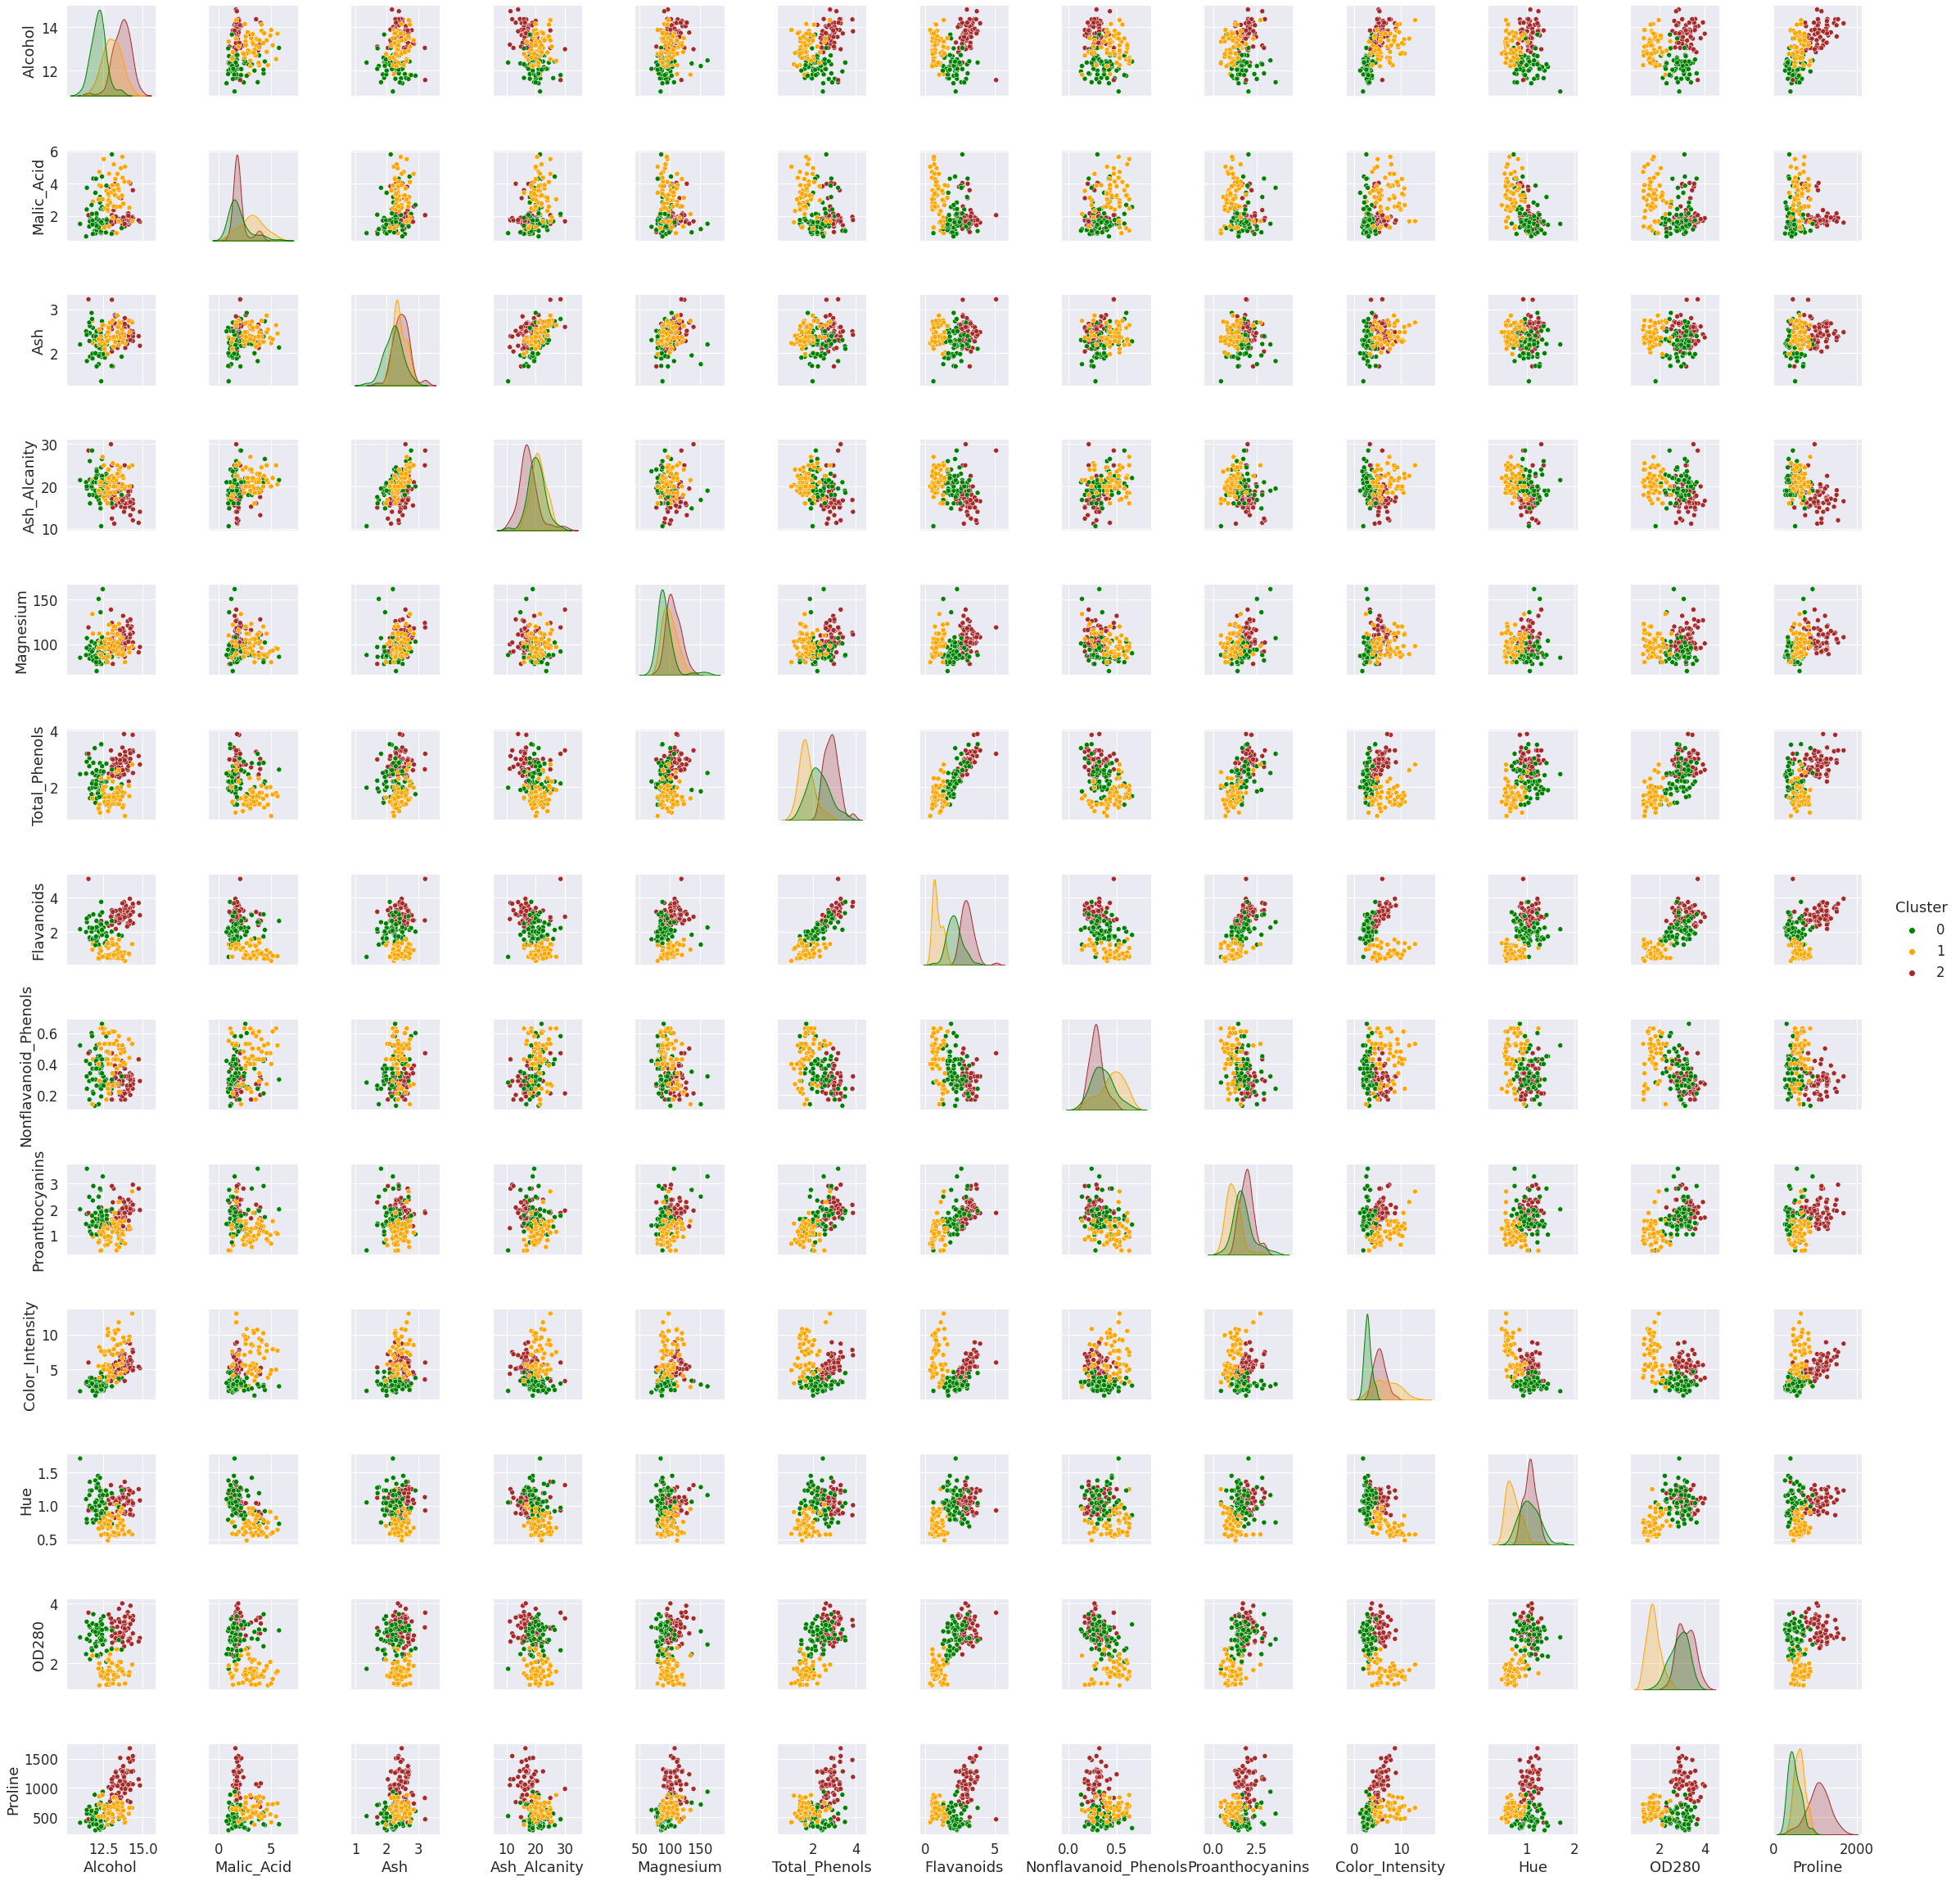

In [12]:
# densidades para cada variable, y scatter plots dos a dos, identificando cada cluster.
sns.pairplot(data, hue="Cluster", palette=['green','orange','brown'])
plt.show()

# ¿Y cómo averiguar las posibles cantidades de clusters?

## Una forma es por el Silhouette score

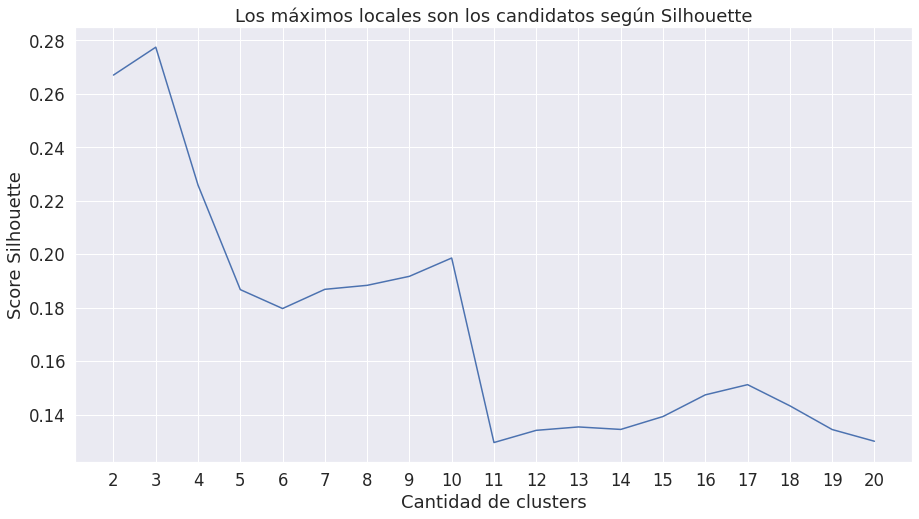

In [26]:
# Silhouette score: va entre -1 y 1 (1 es lo mejor).
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
# https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

silhouette_scores = []
rango_clusters = range(2,21)
politica_agrupamiento = ['ward', 'complete', 'average', 'single']

for i in rango_clusters:
    # para cada valor de i, calculo kmeans y silhouette
    clustering = AgglomerativeClustering(n_clusters=i, linkage=politica_agrupamiento[0])
    # k_means = KMeans(n_clusters=i)
    clustering.fit(data_escalada)
    
    sil_score = silhouette_score(data_escalada, labels=clustering.labels_)
    silhouette_scores.append(sil_score)

plt.plot(rango_clusters,silhouette_scores)
plt.xticks(rango_clusters)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Score Silhouette')
plt.title('Los máximos locales son los candidatos según Silhouette')
plt.show()


# Otras forma de evaluar el clustering: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation